<a href="https://colab.research.google.com/github/Keshav1506/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cardiovascular Risk Prediction**
***
Before diving into the project, lets discuss what are Cardiovascular diseases and some of their major causes.

Cardiovascular diseases, also called CVDs, are the leading cause of death globally, causing an estimated 17.9 million deaths each year. 

***CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions.*** More than four out of five CVD deaths are due to heart attacks and strokes, and one third of these deaths occur prematurely in people under 70 years of age.

The most important behavioural risk factors of heart disease and stroke are **unhealthy diet, physical inactivity, tobacco use** and **harmful use of alcohol**. 

The effects of behavioural risk factors may show up in individuals as raised blood pressure, raised blood glucose, raised blood lipids, and overweight and obesity.

## **Objective** 

The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD) based on their health statistics and information about their tobacco usage.

## **Importing Neccessary Libraries**

Now in this section we'll import all the neccessary libraries and packages we'll require to develop the required model. Libraries like Pandas(and numpy), matplotlib(and seaborn) and sklearn are required for data manipulation, visualization and Machine Learning respectively. 

In [ ]:
# Importing data visualization libraries.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing data manipulation libraries.
import pandas as pd
import numpy as np

# Importing warnings library. The warnings module handles warnings in Python. 
# Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')


## **Data Gathering and Discovery**

Now we'll import the data file and perform some basic operations to understand what type of data that we have and how we can process it to improve the model performance. We'll also check for null values and how we can deal with them.

In [ ]:
# Mounting the Google Drive to access data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# The variable Data_path contains the path of dataset stored in drive.
Data_path = "/content/drive/MyDrive/Alma Better/Capstone Projects/Capstone Project 3 - Cardiovascular Risk/"

# Importing Cardiovascular risk Data File.
Risk_df = pd.read_csv(Data_path + "data_cardiovascular_risk.csv")

# Show the dataframe.
Risk_df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


*Now lets see the first few rows to the dataset to understand the data and see what all attributes are present in the data file.*

In [ ]:
# First 5 rows of dataset.
Risk_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# Last 5 rows of the Dataset.
Risk_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
# Shape of the data file (rows, columns).
Risk_df.shape

(3390, 17)

In [ ]:
# list of columns.
Risk_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

*The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The dataset provides the patient's information and health stats. It includes over 4,000 records and 15 attributes.*

**Data Description and Attributes:-**

* id: Patient identification number.

**Demographic**:

* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)

**Behavioral**

* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**

* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**

* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)

**Dependent variable (desired target)**

* ***10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)***

In [ ]:
# Description of all columns in the dataset.
Risk_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3390.0,NaN,NaN,NaN,1694.5,978.753033,0.0,847.25,1694.5,2541.75,3389.0
age,3390.0,NaN,NaN,NaN,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
education,3303.0,NaN,NaN,NaN,1.970936,1.019081,1.0,1.0,2.0,3.0,4.0
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368.0,NaN,NaN,NaN,9.069477,11.879078,0.0,0.0,0.0,20.0,70.0
BPMeds,3346.0,NaN,NaN,NaN,0.029886,0.170299,0.0,0.0,0.0,0.0,1.0
prevalentStroke,3390.0,NaN,NaN,NaN,0.00649,0.080309,0.0,0.0,0.0,0.0,1.0
prevalentHyp,3390.0,NaN,NaN,NaN,0.315339,0.464719,0.0,0.0,0.0,1.0,1.0
diabetes,3390.0,NaN,NaN,NaN,0.025664,0.158153,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Brief information about the datatype of attributes and their null counts. 
Risk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

We can see there's a lot of null values available in the data, specially in columns like glucose, education, BPMeds, and totchol the numbers are very high. Lets do null counts to be clear on this.

In [ ]:
# checking the total missing values for all the attributes.
Risk_df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

As we can see there's a lot of null values accross different columns. We can be more clear on this once we see a percentage distribution of null value counts and how much they'd affect our analysis.

In [ ]:
# columns that have at least one null value.
missing = Risk_df.columns[Risk_df.isnull().any()].tolist()

# printing missing value counts for various columns.
print('Missing Data Count')
print(Risk_df[missing].isnull().sum().sort_values(ascending = False))

print('--'*12)

# printing missing value percentages for various columns.
print('Missing Data Percentage')
print(round(Risk_df[missing].isnull().sum().sort_values(ascending = False)/len(Risk_df)*100,2))

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


Now the main issue with these null values is that they can't be estimated from other data entries. The dataset we are working on is from a medical domain, that said, the entries in this data are person specific and the values vary among different individuals. Its a rare chance the two individuals share same health stats, hence the most logical option that we have to deal with such values is removing the rows with any null value.

We could have tried imputing them using some advance techniques like *KNNImputer*, but they couldn't be that accurate because it'll use other entries to estimate the nulls, hence the values would depend on the values present among other rows, which as discussed earlier isn't a ideal approach for such dataset.

## **EDA and Feature Engineering**

Exploratory data analysis or commonly known as EDA helps to explore data, and possibly formulate hypotheses that might cause new data collection and experiments. EDA build a robust understanding of the data, issues associated with either the info or process. It’s a scientific approach to get the story of the data.

It focuses more narrowly on checking assumptions required for model fitting and hypothesis testing. It also helps while handling missing values and making transformations of variables as needed. Also we'd deal with outliers in this section. Furthermore, we'll try to extract or convert some of the attributes using some feature engineering.

*Lets just start by removing all null values from the data.*

In [ ]:
# dropping the missing value since we cannot fill it using imputing techniques as 
# this data is related to medical domain (hence varies from person to person).
df = Risk_df.dropna(how = "any")

# Checking if there's still any null values left.
df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

As we can see all the null values have been removed, this surely cost us some valuable data loss but given the options, there was no better choice but to remove those rows having nulls. 

Also the patient ID doesn't contribute their health stats, and it would'nt be of much help to the model either. Hence, we can drop the "ID" column too.

In [ ]:
# Dropping the "id" column.
df = df.drop(columns=['id'])

*Now lets have a look at the remaining columns.*

In [ ]:
# Print all columns.
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Here, **TenYearCHD** signifies if the person has a risk of heart disease or not. Its a binary attribute(binary: “1”, means “Yes”, “0” means “No”) resembling the diagnosis results for patients. We can use this attribute to see how many patients have a risk of CHD.

### TenYearCHD

In [ ]:
# Checking the total people who have a risk of CHD(Coronary Heart Disease).
df["TenYearCHD"].value_counts()

0    2483
1     444
Name: TenYearCHD, dtype: int64

We can see number of patients with heart diasease are significantly low compared to those whose tests came out normal. We can have a better picture by plotting a bar graph. 

*Now lets try to plot the information conveyed above.*

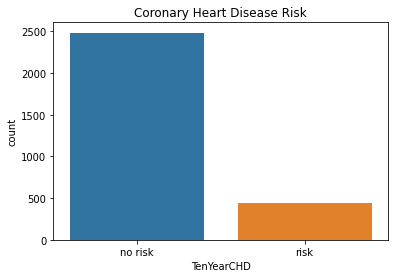

In [ ]:
# plotting number of patients at risk of CHD vs those whose results are normal.
g = sns.countplot(df['TenYearCHD'])
g.set_xticklabels(['no risk','risk'])
g.set_title('Coronary Heart Disease Risk')
plt.show()

It is clear the percentage/count of people with normal results are pretty high and this creates a problem of class imbalance. It could create problems for model to perform better in such case because it'll be overfitted with entries of normal patients and hence it becomes hard to predict for a person with a disorder because the model would be biased for the other output.

So we have to convert this data into a balance class, we can achieve so by using different sampling techniques, during train/test split. 

### Gender

In [ ]:
# Counting the number of males and females.
df["sex"].value_counts()

F    1620
M    1307
Name: sex, dtype: int64

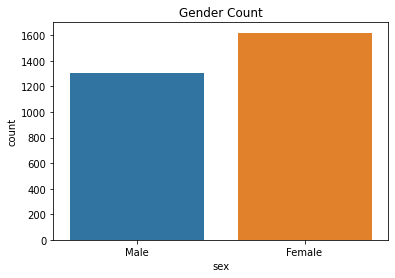

In [ ]:
# Plotting the bar graph with number of males and females.
g = sns.countplot(df['sex'])
g.set_xticklabels(['Male','Female'])
g.set_title('Gender Count')

# Show the graph.
plt.show()

We can see that number of female entries are more than males. Since the data is a bit biased towards females, the model would be much more optimal to predict for a female patient. 

Also we can convert this attribute into binary values (0 and 1) in order to pass it to the training model.

In [ ]:
# Converting "sex" into binary column(0 for females and 1 for males).
df['sex'] = df['sex'].map({'M':1 ,'F': 0})

### Is_Smoking

In [ ]:
# Counting the number of smokers.
df["is_smoking"].value_counts()

NO     1480
YES    1447
Name: is_smoking, dtype: int64

There are nearly same amount of entries with people who smokes and those who does'nt, this is great since it wont cause any class imbalancies or biasness.

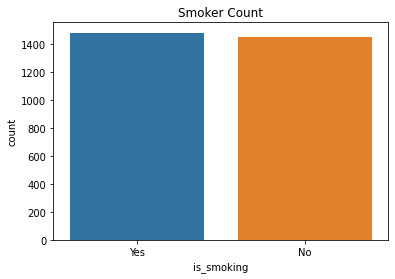

In [ ]:
# Plotting number of people smoking vs not smoking.
g = sns.countplot(df['is_smoking'])
g.set_xticklabels(['Yes','No'])
g.set_title('Smoker Count')

# Show the Graph.
plt.show()

Now, lets see the smoking patterns across different genders. First we'll see the number of males smoking.

In [ ]:
# Number of males who smokes cigarette.
male_smokers = df.loc[(df['is_smoking']=='YES') & (df['sex']=='M')]

In [ ]:
male_smokers

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


There's a total of 809 males who smokes at least one cigarette a day.

In [ ]:
# Number of females who smokes cigarette.
female_smokers = df.loc[(df['is_smoking']=='YES') & (df['sex']=='F')].value_counts()

In [ ]:
# Female smokers.
female_smokers.shape

(0,)

There's a total of 638 females who smokes at least one cigarette a day.

Its clear that number of males who smokes are significantly higher than the female smokers, even though the entries for female patients were more. This shows smoking is more common in males and its a major cause of CHDs for male patients.

Similar to the gender we can convert "is_smoking" into binary too.

In [ ]:
# Converting "is_smoking" into binary(1 for people who smokes and 0 for those who does'nt).
df['is_smoking'] = df['is_smoking'].map({'YES':1 ,'NO': 0})

### Diabetes

In [ ]:
df["diabetes"].value_counts()

0    2848
1      79
Name: diabetes, dtype: int64

We can see that there's a huge gap between the people who have diabetes and to those who does'nt, infact there are only 79 people who does have diabetes. This again depicts the data is biased for non-diabetic patients.

### Distributions

In [ ]:
# Differentiating the numerical and categorical features
categorical_features = [i for i in df.columns if df[i].nunique()<=4]
numeric_features = [i for i in df.columns if i not in categorical_features]

print("Following are the categorical features in this dataset:")
print(categorical_features)
print("Following are the numeric features in this dataset:")
print(numeric_features)

Following are the categorical features in this dataset:
['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
Following are the numeric features in this dataset:
['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose', 'MAP']


Categorical Features are mostly binary type in our case, hence the values majorly are either 0 and 1 (some exceptions excluded). As for the numeric features, all have a different set of range and continuity of values.

Now, lets see the distribution graphs for all features.

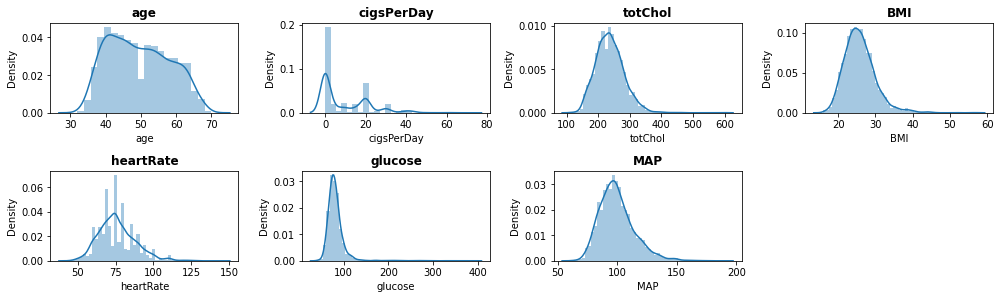

In [ ]:
# Visualizing the distributions for numeric features 
plt.figure(figsize=(14,10))
for i, column in enumerate(numeric_features):
  plt.subplot(5, 4, i+1)
  sns.distplot(df[column])
  plt.title(f'{column}', weight='bold')
  plt.tight_layout()

****************************
###############

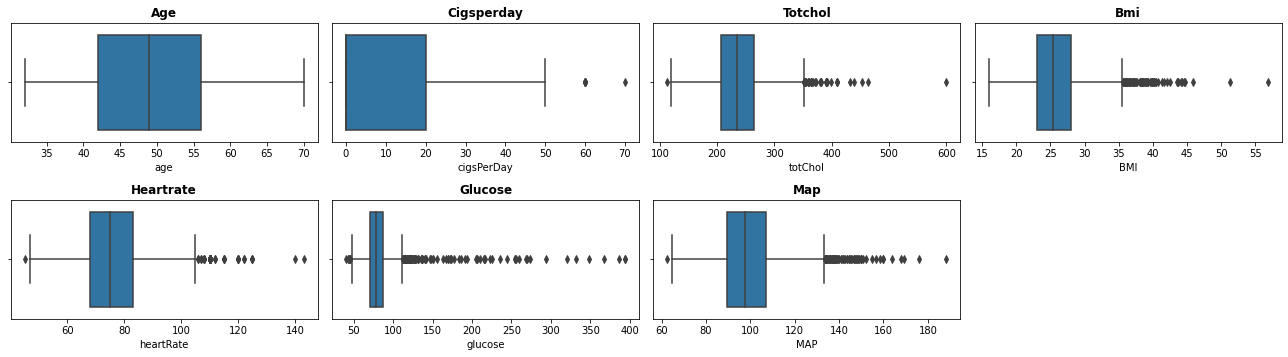

In [ ]:
plt.figure(figsize=(18,12))
for i,column in enumerate(numeric_features):
  plt.subplot(5, 4, i+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

**UNIVARIATE ANALYSIS**

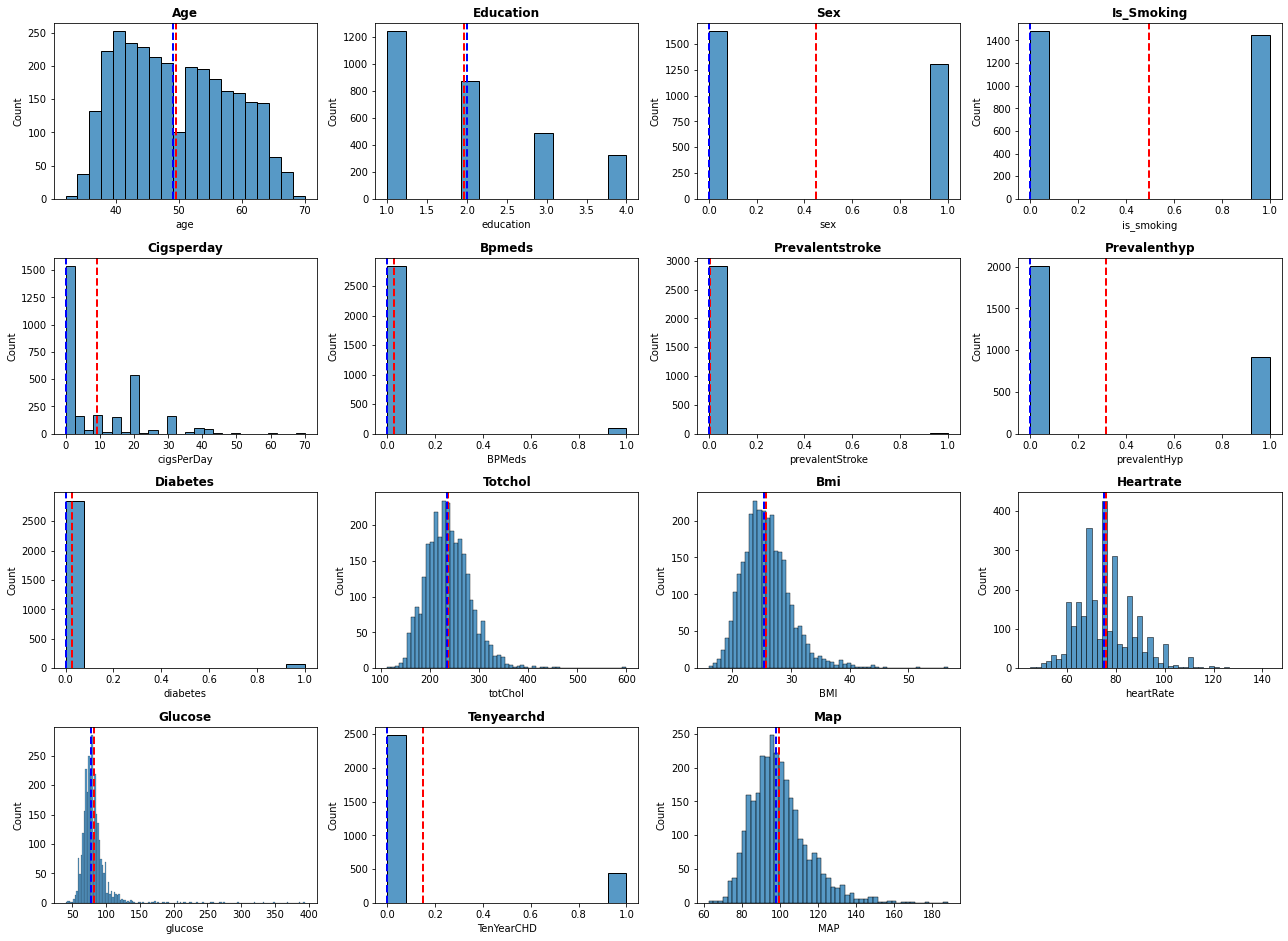

In [ ]:
# Visualizing the mean and median.
plt.figure(figsize=(18,16))
for i, column in enumerate(df.columns):
  feature = df[column]
  ax=plt.subplot(5, 4, i+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

**BIVARIATE ANALYSIS**

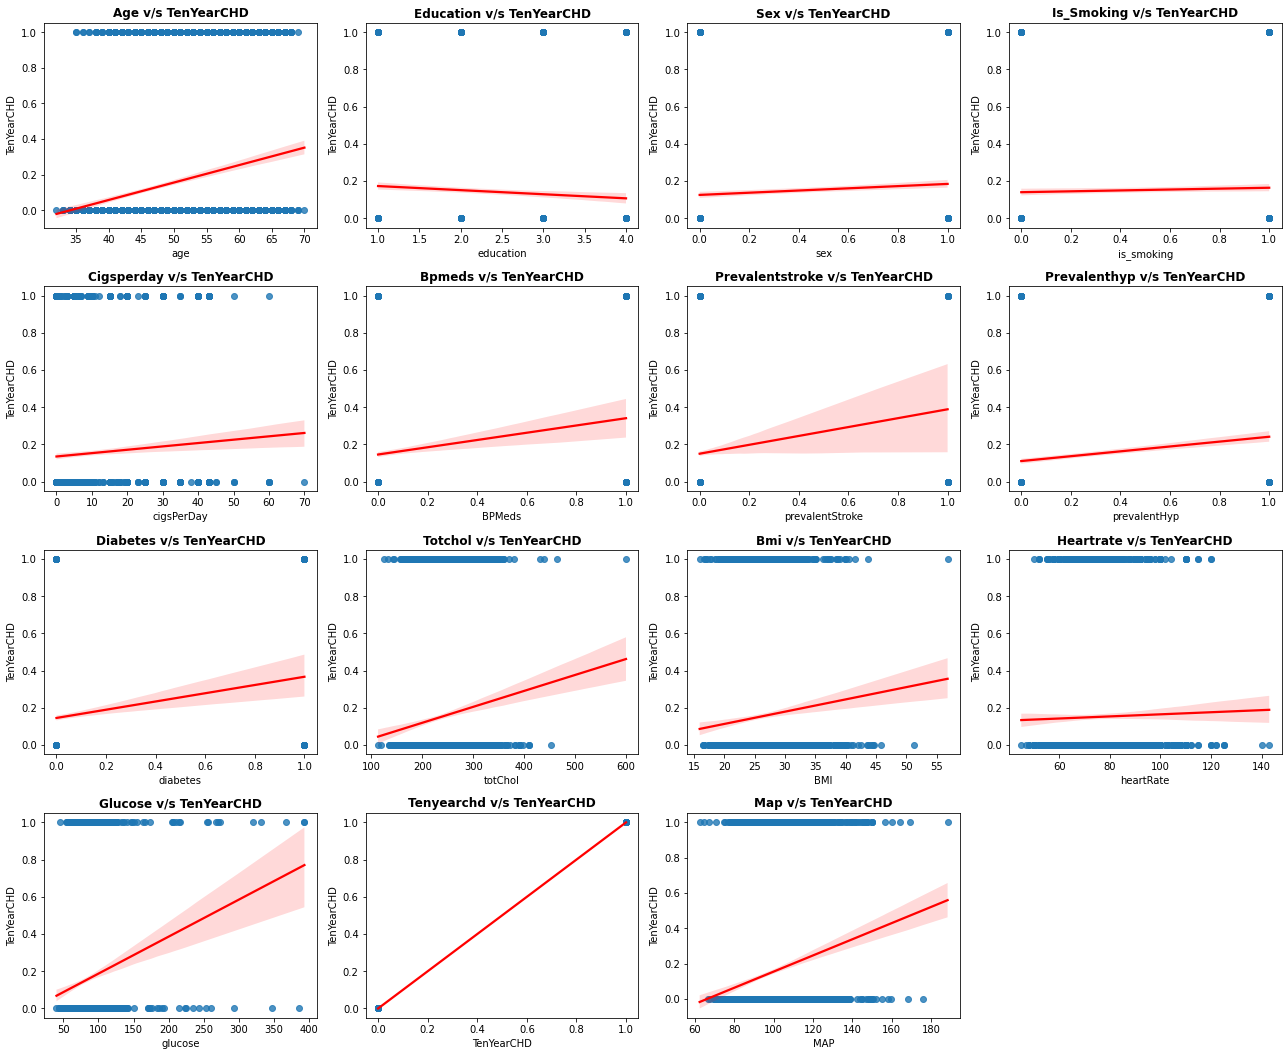

In [ ]:
# Checking Linearity
independent_variables = [i for i in df.columns if i not in ['id', 'TenYearCHD']]

plt.figure(figsize=(18,18))
for n, column in enumerate(df.columns ):
  plt.subplot(5, 4, n+1)
  sns.regplot(x = df[column], y =df['TenYearCHD'],line_kws={"color": "red"})
  plt.title(f'{column.title()} v/s TenYearCHD',weight='bold')
  plt.tight_layout()

**MULTIVARIATE ANALYSIS**

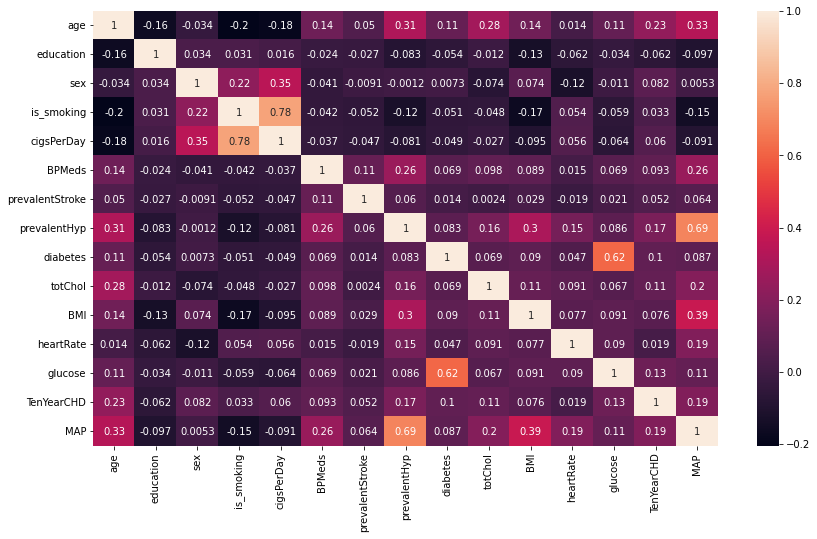

In [ ]:
correlmap = df.corr()
f, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(correlmap, annot=True, ax = ax)

### DiaBp and SysBP

We can see both of these columns are heavily correleted, there's some relationship we can establish with these two features further.

Also Elevation of systolic blood pressure predicts the risk of cardiovascular disease better than increases in diastolic blood pressure. Although associated with more variability in measurement, systolic blood pressure is easier to determine and allows more appropriate risk stratification than diastolic blood pressure.

We can combine these two features using the following formula:

**MAP = (Systolic Blood Pressure + 2 x Diastolic Blood Pressure) / 3**
----------------

*Here, MAP signifies Mean Arterial Pressure*

In [ ]:
# Calculating MAP using 'SysBP' and 'DiaBP'.
df["MAP"] = (df["sysBP"] + 2 * df["diaBP"])/3

In [ ]:
df.drop(columns = ["sysBP", "diaBP"], inplace = True)

In [ ]:
df

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,MAP
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,0,121.333333
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,86.000000
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,1,111.333333
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,26.42,70.0,77.0,0,102.166667
5,61,3.0,0,0,0.0,0.0,0,1,0,272.0,32.80,85.0,65.0,1,141.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61,1.0,0,0,0.0,0.0,0,1,0,217.0,26.98,105.0,113.0,0,118.000000
3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,29.28,70.0,103.0,0,93.833333
3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,21.96,80.0,84.0,0,71.333333
3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,28.92,73.0,72.0,1,134.000000


## Model Building

### Prerequisites

In [ ]:
X = df.drop('TenYearCHD',axis=1).values
y = df['TenYearCHD'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)

In [ ]:
pd.DataFrame(y_train).value_counts()

0    1986
1     355
dtype: int64

In [ ]:
pd.DataFrame(y_test).value_counts()

0    497
1     89
dtype: int64

In [ ]:
# from sklearn.preprocessing import MinMaxScaler


In [ ]:
# scaler_range = MinMaxScaler()
# scaler_range.fit(X_train)

In [ ]:
# df_train_scaled = pd.DataFrame(scaler_range.transform(X_train))
# df_test_scaled = pd.DataFrame(scaler_range.transform(X_test))

In [ ]:
from imblearn.combine import SMOTETomek
X_smote, y_smote = SMOTETomek(random_state=42).fit_resample(X_train, y_train)

In [ ]:
#dataframe to contain results
res_df=pd.DataFrame()

## K-Nearest Neighbour (KNN)

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_smote, y_smote)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_smote, y_smote)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

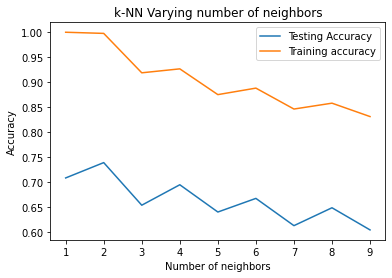

In [ ]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=2)

In [ ]:
# Fit the model
knn.fit(X_smote,y_smote)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix,roc_curve

In [ ]:
# Let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[411,  86],
       [ 67,  22]])

In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

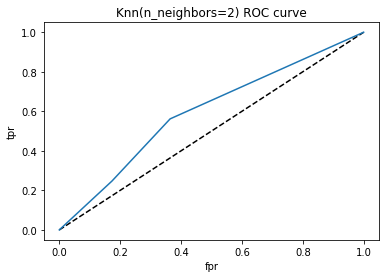

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=2) ROC curve')
plt.show()

In [ ]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.5952117197567427

In [ ]:
# Finding precision and recall
from sklearn.metrics import precision_score, recall_score
recall_score(y_test, y_pred)

0.24719101123595505

In [ ]:
precision_score(y_test, y_pred)


0.2037037037037037

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_smote,y_smote)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
knn_cv.best_score_

0.8834971403187295

In [ ]:
knn_cv.best_params_

{'n_neighbors': 2}

In [ ]:
from sklearn.metrics import classification_report 
#adding results to results df
dict1= classification_report(y_test,y_pred,output_dict=True)
tempodf=pd.DataFrame(dict1).transpose()
tempodf['Model'] = 'K Nearest Neighbours Classifier'

res_df=res_df.append(tempodf)

In [ ]:
classification_report(y_test, y_pred)
            

'              precision    recall  f1-score   support\n\n           0       0.86      0.83      0.84       497\n           1       0.20      0.25      0.22        89\n\n    accuracy                           0.74       586\n   macro avg       0.53      0.54      0.53       586\nweighted avg       0.76      0.74      0.75       586\n'

In [ ]:
res_df

,precision,recall,f1-score,support,Model
0,0.859833,0.826962,0.843077,497.000000,K Nearest Neighbours Classifier
1,0.203704,0.247191,0.223350,89.000000,K Nearest Neighbours Classifier
accuracy,0.738908,0.738908,0.738908,0.738908,K Nearest Neighbours Classifier
macro avg,0.531768,0.537076,0.533214,586.000000,K Nearest Neighbours Classifier
weighted avg,0.760182,0.738908,0.748955,586.000000,K Nearest Neighbours Classifier


## Naive Bayes Classifier.

In [ ]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_smote, y_smote)
 
# making predictions on the testing set
y_test_pred = gnb.predict(X_test)
y_train_pred = gnb.predict(X_smote)



In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train_pred,y_smote))
print(accuracy_score(y_test_pred,y_test))

0.5866121614716403
0.8242320819112628


In [ ]:
confusion_matrix(y_smote,y_train_pred)

array([[1776,  181],
       [1437,  520]])

In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[456,  41],
       [ 62,  27]])

In [ ]:
y_pred_proba = gnb.predict_proba(X_test)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

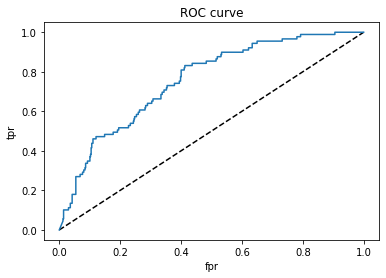

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.755928831415459

In [ ]:
from collections import Counter

In [ ]:
Counter(y_test)

Counter({0: 497, 1: 89})

In [ ]:

#adding results to results df
dict1= classification_report(y_test,y_test_pred,output_dict=True)
tempodf=pd.DataFrame(dict1).transpose()
tempodf['Model'] = 'Gaussian Naive Bayes Classifier'

res_df=res_df.append(tempodf[:-2])

In [ ]:
res_df

,precision,recall,f1-score,support,Model
0,0.859833,0.826962,0.843077,497.000000,K Nearest Neighbours Classifier
1,0.203704,0.247191,0.223350,89.000000,K Nearest Neighbours Classifier
accuracy,0.738908,0.738908,0.738908,0.738908,K Nearest Neighbours Classifier
macro avg,0.531768,0.537076,0.533214,586.000000,K Nearest Neighbours Classifier
weighted avg,0.760182,0.738908,0.748955,586.000000,K Nearest Neighbours Classifier
0,0.880309,0.917505,0.898522,497.000000,Gaussian Naive Bayes Classifier
1,0.397059,0.303371,0.343949,89.000000,Gaussian Naive Bayes Classifier
accuracy,0.824232,0.824232,0.824232,0.824232,Gaussian Naive Bayes Classifier


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_smote, y_smote)

LogisticRegression(max_iter=10000)

In [ ]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_smote)
test_preds = clf.predict_proba(X_test)

In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(X_smote)
test_class_preds = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_smote)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6742462953500256
The accuracy on test data is  0.6484641638225256


In [ ]:
confusion_matrix(y_test,test_class_preds)

array([[319, 178],
       [ 28,  61]])

In [ ]:
#adding results to results df
dict1= classification_report(y_test,y_pred,output_dict=True)
tempodf=pd.DataFrame(dict1).transpose()
tempodf['Model'] = 'Logistic Classifier'

res_df=res_df.append(tempodf)

In [ ]:
res_df

,precision,recall,f1-score,support,Model
0,0.859833,0.826962,0.843077,497.000000,K Nearest Neighbours Classifier
1,0.203704,0.247191,0.223350,89.000000,K Nearest Neighbours Classifier
accuracy,0.738908,0.738908,0.738908,0.738908,K Nearest Neighbours Classifier
macro avg,0.531768,0.537076,0.533214,586.000000,K Nearest Neighbours Classifier
weighted avg,0.760182,0.738908,0.748955,586.000000,K Nearest Neighbours Classifier
0,0.880309,0.917505,0.898522,497.000000,Gaussian Naive Bayes Classifier
1,0.397059,0.303371,0.343949,89.000000,Gaussian Naive Bayes Classifier
accuracy,0.824232,0.824232,0.824232,0.824232,Gaussian Naive Bayes Classifier
0,0.859833,0.826962,0.843077,497.000000,Logistic Classifier
1,0.203704,0.247191,0.223350,89.000000,Logistic Classifier


## Support Vector Machine

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
svmc = svm.SVC(kernel='poly') # Polynomial Kernel

#Train the model using the training sets
svmc.fit(X_smote, y_smote)

#Predict the response for test dataset
y_pred = svmc.predict(X_smote)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
svmc.score(X_test,y_test)


0.6825938566552902

In [ ]:
res_df

,precision,recall,f1-score,support,Model
0,0.859833,0.826962,0.843077,497.000000,K Nearest Neighbours Classifier
1,0.203704,0.247191,0.223350,89.000000,K Nearest Neighbours Classifier
accuracy,0.738908,0.738908,0.738908,0.738908,K Nearest Neighbours Classifier
macro avg,0.531768,0.537076,0.533214,586.000000,K Nearest Neighbours Classifier
weighted avg,0.760182,0.738908,0.748955,586.000000,K Nearest Neighbours Classifier
0,0.880309,0.917505,0.898522,497.000000,Gaussian Naive Bayes Classifier
1,0.397059,0.303371,0.343949,89.000000,Gaussian Naive Bayes Classifier
accuracy,0.824232,0.824232,0.824232,0.824232,Gaussian Naive Bayes Classifier
0,0.859833,0.826962,0.843077,497.000000,Logistic Classifier
1,0.203704,0.247191,0.223350,89.000000,Logistic Classifier


## XGB Classifier

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBClassifier()
model.fit(X_smote, y_smote)
print(); print(model)


XGBClassifier()


In [ ]:
# making predictions on the testing set
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_smote)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train_pred,y_smote))
print(accuracy_score(y_test_pred,y_test))

0.8949923352069494
0.8276450511945392


In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[470,  27],
       [ 74,  15]])

## Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(200):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_smote,y_smote)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
# rf = RandomForestClassifier()

rf.fit(X_smote,y_smote)
Y_pred_rf = rf.predict(X_test)

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,y_test)*100,2)

print("The accuracy score for test dat achieved using Random forest is: " + str(score_rf)+" %")

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,Y_pred_rf)

In [ ]:
y_pred_train_rf = rf.predict(X_smote)

In [ ]:
score_rf = round(accuracy_score(y_pred_train_rf, y_smote)*100,2)

print("The accuracy score for trained data achieved using random forest is: " + str(score_rf)+" %")

## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_smote,y_smote)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_smote,y_smote)
Y_pred_dt = dt.predict(X_test)

In [ ]:
score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['TenYearCHD'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 3)

In [ ]:
from tensorflow import keras

def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=[X_train.shape[-1]]),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(9, activation='softmax')
    ])
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
import tensorflow as tf

batch_size = 512
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(len(x_train)).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

model = get_model()
fit = model.fit(train_ds, validation_data=val_ds, epochs=20)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fit.history['accuracy'], color='blue')
plt.plot(fit.history['val_accuracy'], color='red')
plt.show()